# Campus Recruitment Prediction Model

## Predicting a Categorical Variable Using Multiple Models

---



In [719]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [720]:
# Get the train dataset from the source
df_train=pd.read_csv("train.csv")
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [721]:
# Get the test dataset from the source
df_test=pd.read_csv("test.csv")
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Exploring the dataset

In [722]:
# Descriptive statistics
df_train.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [723]:
# Summary of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


Train dataset has 15 columns

In [724]:
# Descriptive statistics
df_test.describe()

,sl_no,gender,salary
count,43.000000,43.000000,43.000000
mean,109.511628,0.418605,291360.150849
std,56.870518,0.499169,74495.346053
min,11.000000,0.000000,216000.000000
25%,71.000000,0.000000,250000.000000
50%,103.000000,0.000000,288655.405405
75%,151.500000,1.000000,288655.405405
max,210.000000,1.000000,650000.000000


In [725]:
# Summary of dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   43 non-null     int64  
 1   gender  43 non-null     int64  
 2   salary  43 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


Test dataset has 3 columns.

In [726]:
# Identify the common 'sl_no' values between train and test datasets
common_sl_no = df_train['sl_no'].isin(df_test['sl_no']).sum()
print(f"Number of common 'sl_no' entries: {common_sl_no}")

Number of common 'sl_no' entries: 43


Based on the sl_no column as unique identifier, it can be observed that all records in the test dataset are consistent value in the gender column vs the training dataset, however, l6 records have different salary value.
I decide to work just with train dataset and extract a new test dataset

In [727]:
# Verify if there are null values.
# It is observed the dataset is mostly clean in this case just null salary values in in cases with status Not Placed
df_train.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


### Now check the values in categorical features. It is observed that they contains 2 classes each one

In [728]:
df_train['ssc_b'].value_counts()

,count
ssc_b,
Central,116
Others,99


In [729]:
df_train['hsc_b'].value_counts()

,count
hsc_b,
Others,131
Central,84


In [730]:
df_train['hsc_s'].value_counts()

,count
hsc_s,
Commerce,113
Science,91
Arts,11


In [731]:
df_train['degree_t'].value_counts()

,count
degree_t,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [732]:
df_train['workex'].value_counts()

,count
workex,
No,141
Yes,74


In [733]:
df_train['specialisation'].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [734]:
df_train['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


### Show visualization of the data

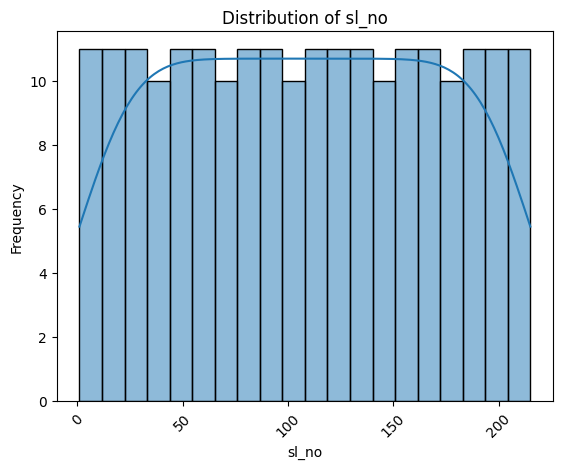

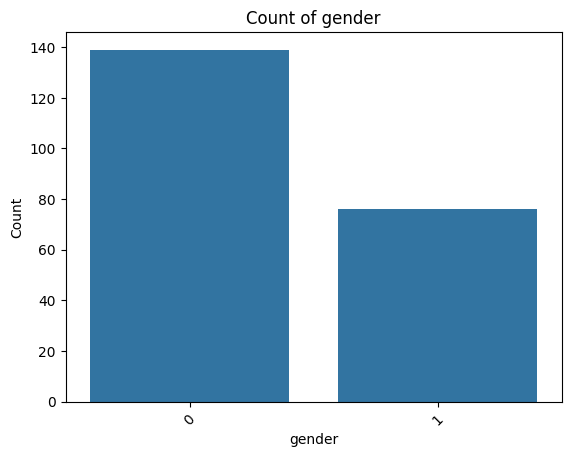

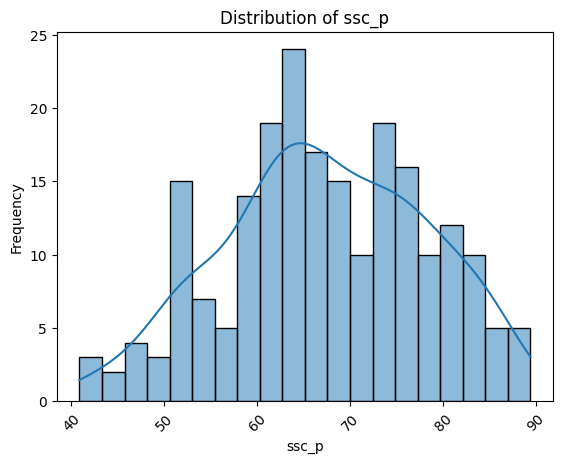

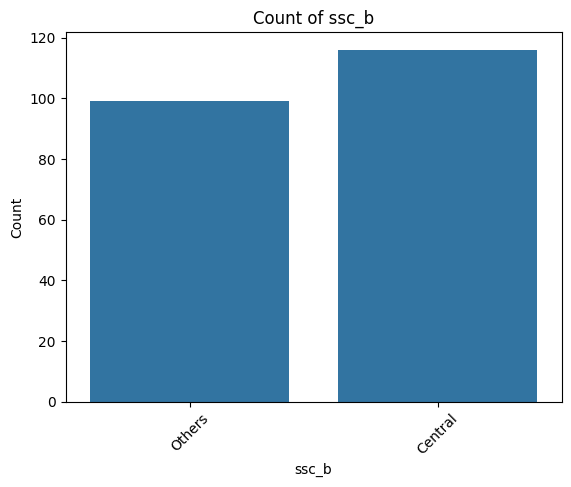

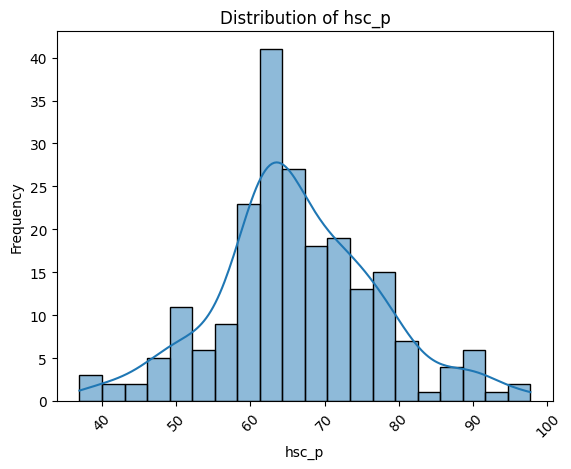

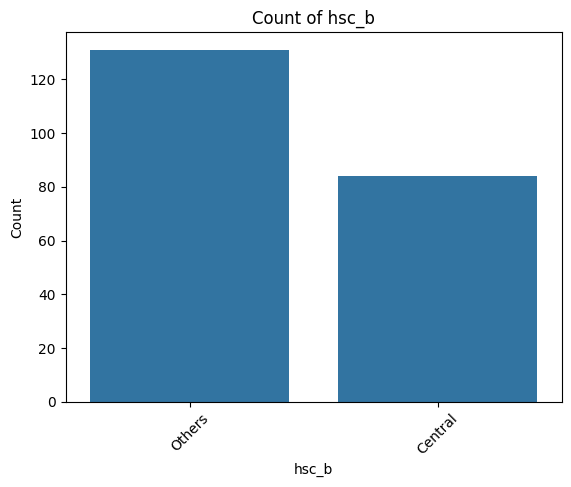

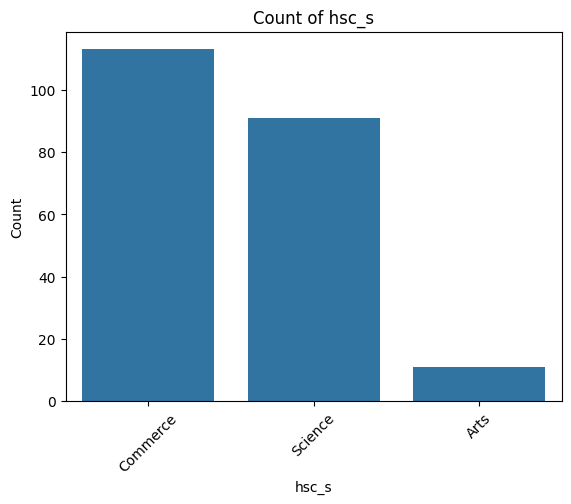

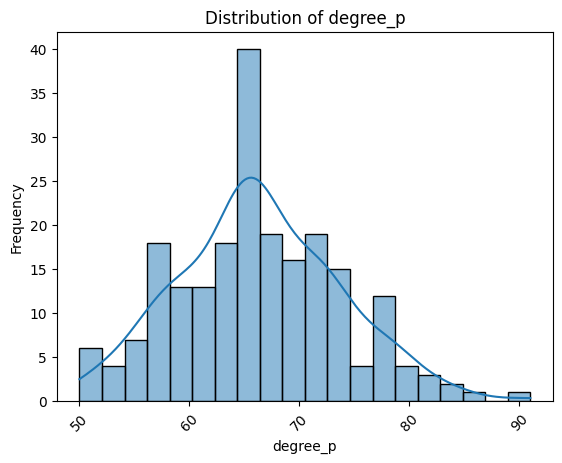

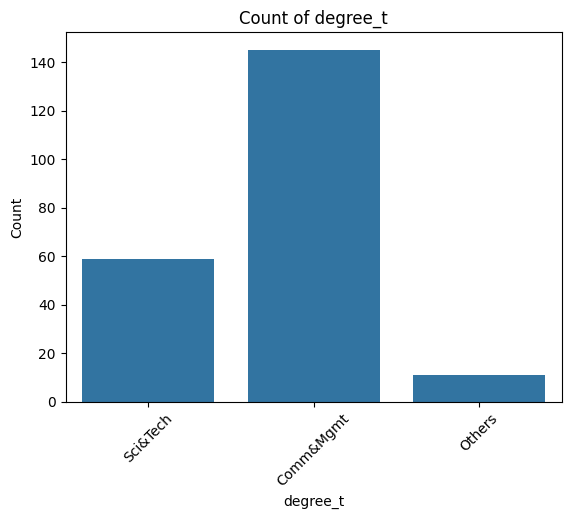

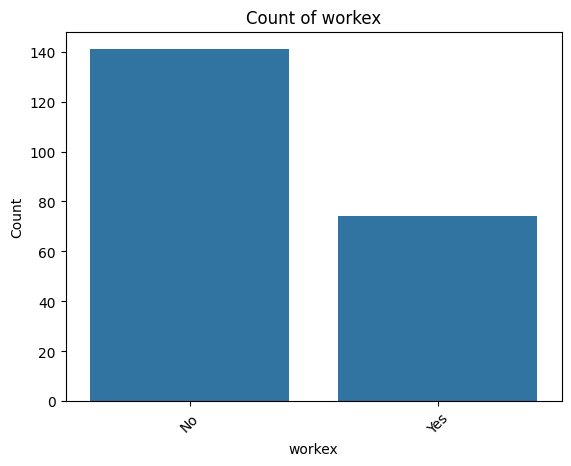

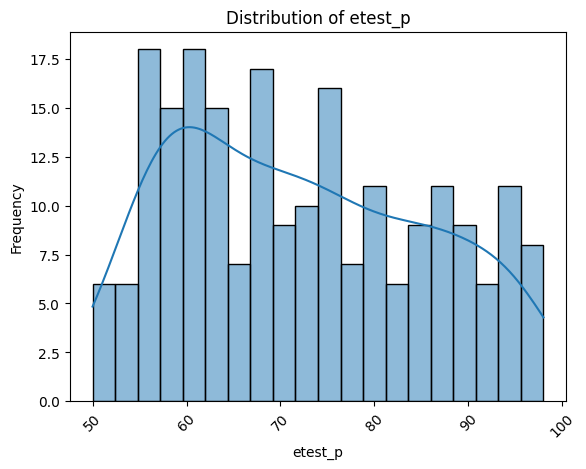

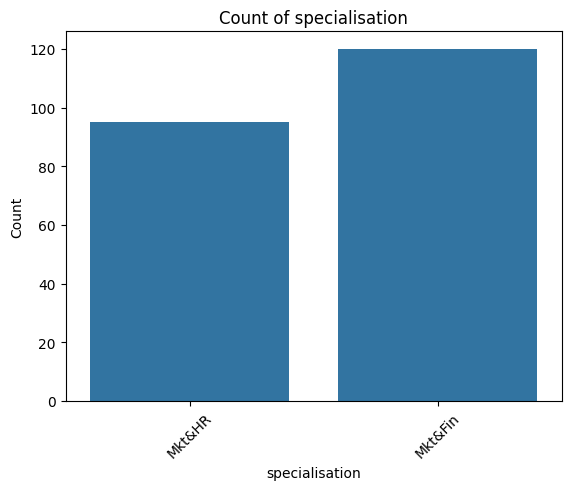

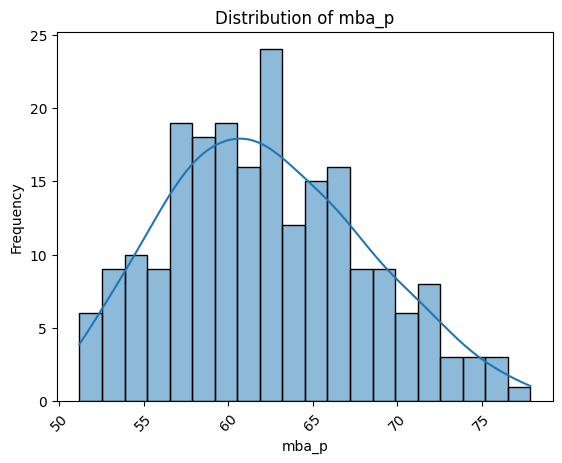

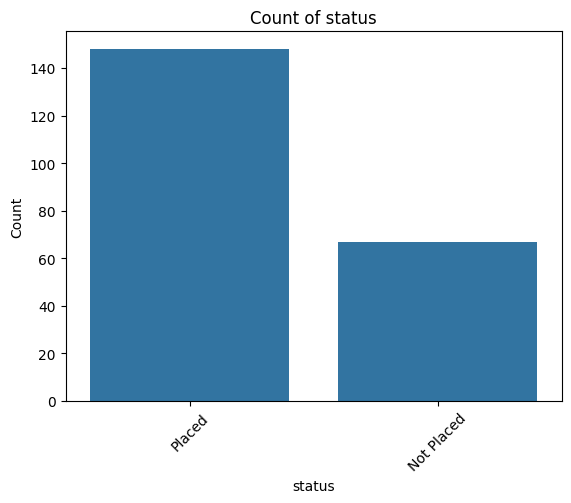

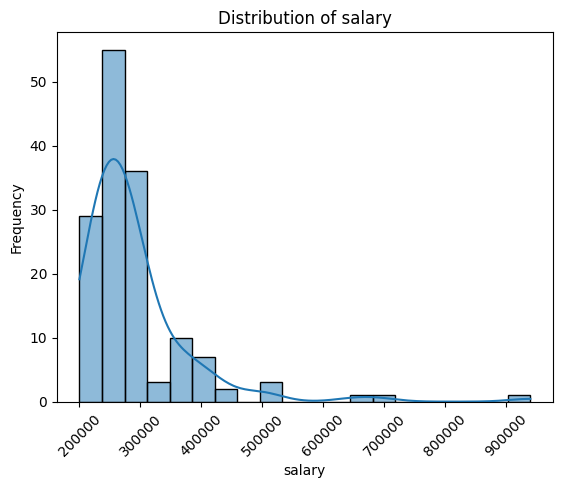

In [735]:

# Iterate through each column in the dataframe
for column in df_train.columns:
    # If the feature is categorical, plot a count plot
    if df_train[column].dtype == 'object' or df_train[column].nunique() < 20:
        sns.countplot(data=df_train, x=column)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

    # If the feature is numerical, plot a histogram for distribution
    else:
        sns.histplot(df_train[column], bins=20, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.xticks(rotation=45)
    plt.show()


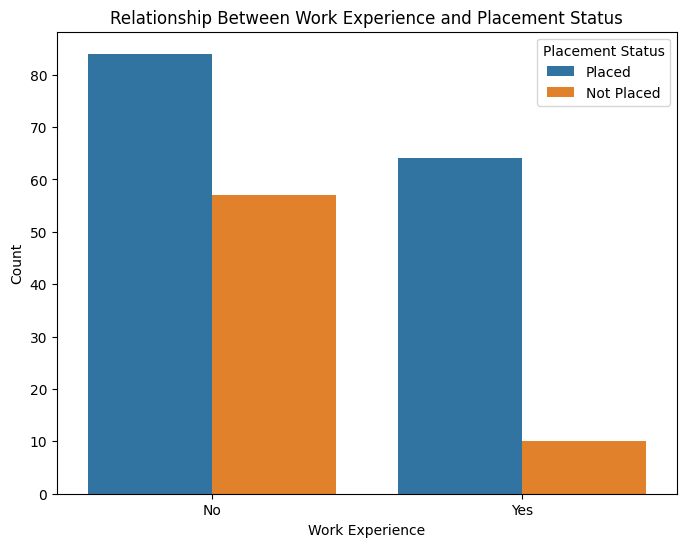

In [736]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='workex', hue='status')
plt.title('Relationship Between Work Experience and Placement Status')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.legend(title='Placement Status', loc='upper right')
plt.show()

The data show:

*   There are more records if gender 0, which is not clear it is male or female
*   Highest of degree is in Commerce & Management
*   Most of the student have been recruited
*   Students with specialization in Mkt & Fin are majority
*   There are more students with no work experience
*   Most students have gotten a salary between 200000 and 300000
*   The most student recruited do not have experience




## Preprocesing the Data

In [737]:
# Using map function to replace the values 'Not Place':0 and 'Placed': 1; 'Not Place': 0

df_train['status']=df_train['status'].map({'Not Placed':0,'Placed':1})
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.0


In [738]:
# split the data into independent/input and dependent/Target variables

x=df_train.drop('status',axis=1)
y=df_train['status']

In [739]:
# create pipeline to scale data and transform data in independt variables
num_cols=[col for col in x.columns if df_train[col].dtype !='O']
cat_cols=[col for col in x.columns if df_train[col].dtype =='O']

# define num_features_pipeline
# impute missing values with median
# scale the numeric values to normalize the data
num_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])

# define cat_features_pipeline
#impute missing values using the most frequent
# Apply OHE to transform categorical in numerical
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first'))])

# Define tranformes to numerical and categorical columns
preprocessor=ColumnTransformer(transformers=[
                               ('num',num_pipeline, num_cols),
                               ('cat',cat_pipeline, cat_cols)])

# Apply pipelines to preprocessing defined
final_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor)])

In [740]:
# split the input and target variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [741]:
# Apply pipeline to transform and scale the data
x_train_tr=final_pipeline.fit_transform(x_train)
x_test_tr=final_pipeline.transform(x_test)


## Build the model

Logistic Regression
Confusion Matrix


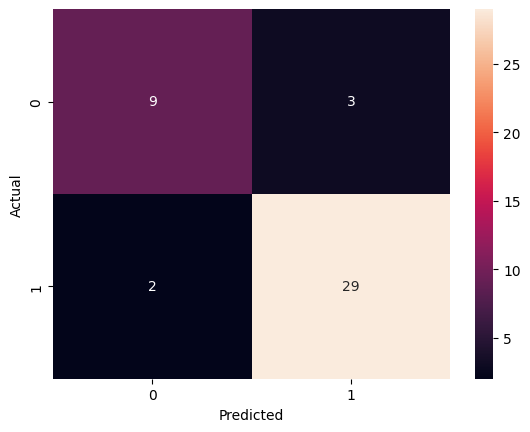

Metrics
Accuracy Score: 0.8837209302325582
Precision Score: 0.90625
Recall Score: 0.9354838709677419
F1 Score: 0.9206349206349206


In [742]:
# 1. Baseline Model Logistic Regresion to train and predict a Binary classification problem
lr = LogisticRegression(max_iter=1000)

# Train the model
lr.fit(x_train_tr, y_train)

# evaluate the model
y_pred = lr.predict(x_test_tr)

print("===============================================================================")
print("Logistic Regression")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mx,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

### For Base Linear Regression Model base it is observed:
The model correctly predicted 29 cases for class 1 "Placed"
and 9 correctlty True Negatives from 43 records in test dataset which is the majority of success while the incorrect predictions are minimzed.



Hyperparameter Tuning
Confusion Matrix


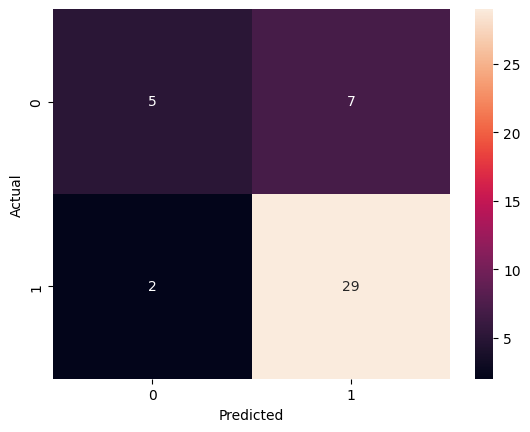

Metrics
Accuracy Score: 0.7906976744186046
Precision Score: 0.8055555555555556
Recall Score: 0.9354838709677419
F1 Score: 0.8656716417910447


In [743]:
# 2. Hyperparameter Tuning with cross validation
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, scoring='f1', cv=5) #5-fold cross-validation for each parameter combination

# Train the model
grid_search.fit(x_train_tr, y_train)

# select the best estimator
best_lr = grid_search.best_estimator_

# Evaluate the model
y_pred_tuned = best_lr.predict(x_test_tr)

print("===============================================================================")
print("Hyperparameter Tuning")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx=confusion_matrix(y_test,y_pred_tuned)
sns.heatmap(conf_mx,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred_tuned))
print("Precision Score:",precision_score(y_test,y_pred_tuned))
print("Recall Score:",recall_score(y_test,y_pred_tuned))
print("F1 Score:",f1_score(y_test,y_pred_tuned))


### For Linear Regression Model with Hyperparameter tunning it is observed:
The model correctly predicted 29 cases for class 1 "Placed"
and 5 correctlty True Negatives from 43 records in test dataset which is the majority of success while the incorrect predictions are minimze.
However the results are not better than the Base Model and the metrics has a slightly decrease, which indicates that the model base performed better than this

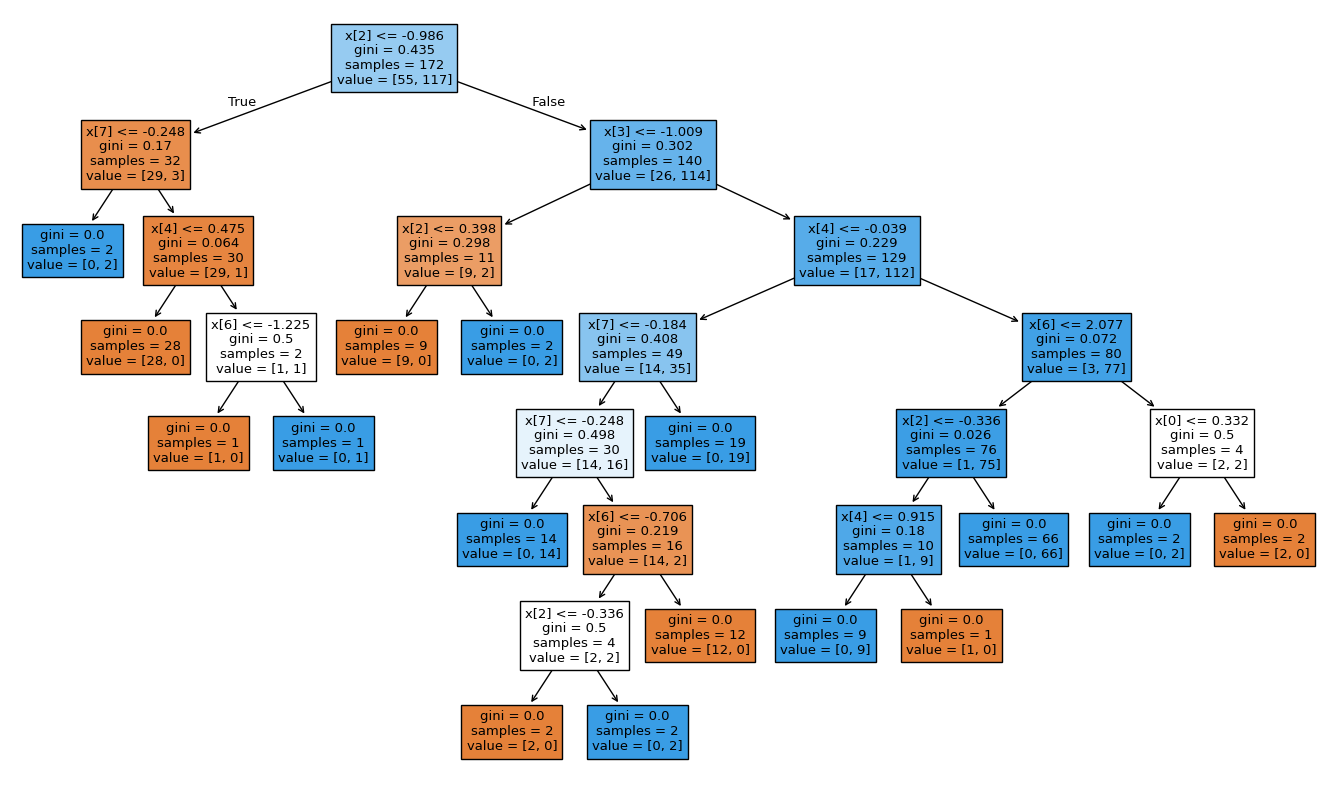

Decision Tree
Confusion Matrix


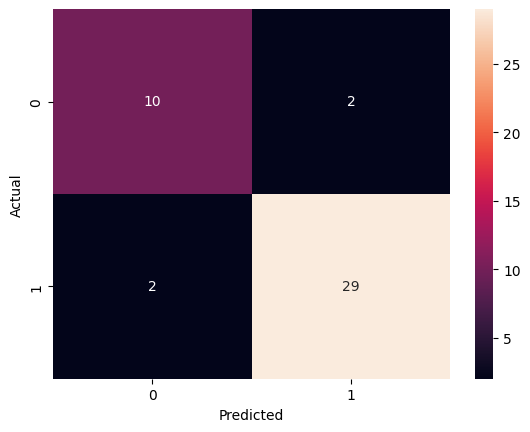

Metrics
Accuracy Score: 0.9069767441860465
Precision Score: 0.9354838709677419
Recall Score: 0.9354838709677419
F1 Score: 0.9354838709677419


In [744]:
# 3. Decision Tree Classifier

from sklearn.tree import plot_tree

# Initiate the model
model=DecisionTreeClassifier()

# train the model
model.fit(x_train_tr,y_train)

# evaluate the model
y_pred_t=model.predict(x_test_tr)

# Graphic the tree
plt.figure(figsize=(17,10))
plot_tree(model, filled=True)
plt.show()

print("===============================================================================")
print("Decision Tree")

# CONFUSION_MATRIX
print("Confusion Matrix")
conf_mx=confusion_matrix(y_test,y_pred_t)
sns.heatmap(conf_mx,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Evaluation Metrics for test data
print("Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred_t))
print("Precision Score:",precision_score(y_test,y_pred_t))
print("Recall Score:",recall_score(y_test,y_pred_t))
print("F1 Score:",f1_score(y_test,y_pred_t))

### For Decision Tree Model it is observed:
The model correctly predicted 29 cases for class 1 "Placed"
and 10 correctlty True Negatives from 43 records in test dataset which is the majority of success while the incorrect predictions are minimzed. Given better results than the others models.


## Applying voting technique

In [745]:
# create technique for voting regressor

classification_models={
    'LogisticRegression':lr,
    'Hyperparameter Tuning':best_lr,
    'DecisionTree':model,
    'RandomForest':RandomForestClassifier()
}

estimator=[]
for name,model in classification_models.items():
    estimator.append((name,model))

vr_model=VotingClassifier(estimators=estimator, weights=[2,1,2,3])

# Train the model
vr_model.fit(x_train_tr,y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('Hyperparameter Tuning',
                              LogisticRegression(C=0.1, max_iter=1000)),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('RandomForest', RandomForestClassifier())],
                 weights=[2, 1, 2, 3])

In [746]:
# evaluate the model using test data
y_pred_v=vr_model.predict(x_test_tr)

In [747]:
# CONFUSION_MATRIX
conf_mx=confusion_matrix(y_test,y_pred_v)

<Axes: >

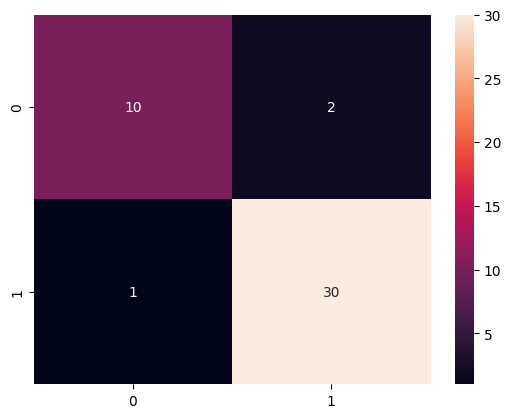

In [748]:
sns.heatmap(conf_mx,annot=True)

In [749]:
# Calculate Metrics
print("Accuracy Score:",accuracy_score(y_test,y_pred_v))
print("Precision Score:",precision_score(y_test,y_pred_v))
print("Recall Score:",recall_score(y_test,y_pred_v))
print("F1 Score:",f1_score(y_test,y_pred_v))

Accuracy Score: 0.9302325581395349
Precision Score: 0.9375
Recall Score: 0.967741935483871
F1 Score: 0.9523809523809523


Applying Voting Classifier technique and including Random forrest model the results has improved and it has been obtained high metrics:

High Accuracy (90.69%) indicates that the model is performing well.

High Precision (90.9%) suggests that the model is effective at minimizing false positives, so when it predicts a positive, it is usually correct.

High Recall (96.77%) shows that the model is also good at capturing true positives, meaning it correctly identifies most actual positives.

Strong F1 Score (93.75%) reflects a well-balanced performance between precision and recall.

The model is performig very well. However, there is room to continue improving it.

For the analisis of data set I can conclude:


*   The educational scores and percentages have a impact the the result
*   The work exprience has no influence in the possibility to get hired
*   The careers in Marketing and finances has high possibility to get hired
*   There is not a visible feature that indicates the salary to obtain
*   There are not enough information in this dataset that indicate some relation to genre and be recruited








